In [34]:
#importing all libraries required for the linear regression model

import os
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import pickle as pkl
import warnings
warnings.filterwarnings("ignore")
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style
import seaborn as sns 
from sklearn import metrics
#import numpy as np


In [35]:
#using the pandas library to read the csv file

data = pd.read_csv('StockX Dataset.csv')
data

,Order_Date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region
0,01/09/2017,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,24/09/2016,11.0,California
1,01/09/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,23/11/2016,11.0,California
2,01/09/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,23/11/2016,11.0,California
3,01/09/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,23/11/2016,11.5,Kentucky
4,01/09/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,11/02/2017,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,13/02/2019,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$565,$220,26/12/2018,8.0,Oregon
99952,13/02/2019,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$598,$220,26/12/2018,8.5,California
99953,13/02/2019,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$605,$220,26/12/2018,5.5,New York
99954,13/02/2019,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$650,$220,26/12/2018,11.0,California


In [36]:
#using the pandas library to split the Order Date and Release Date

data[['Order_Day', 'Order_Month', 'Order_Year']] = data['Order_Date'].str.split('/', expand=True)
data[['Release_Day', 'Release_Month', 'Release_Year']] = data['Release_Date'].str.split('/', expand=True)

In [37]:
#creating a dataframe for only necessary columns that are in the regression model

data = data[['Order_Day', 'Order_Month', 'Order_Year', 
             'Release_Day', 'Release_Month', 'Release_Year',
             'Brand', 'Sneaker_Name', 'Shoe_Size', 
             'Buyer_Region', 'Retail_Price', 'Sale_Price']]

In [38]:
#converting the strings to numerical values

data['Order_Day'] = pd.to_numeric(data['Order_Day'])
data['Order_Month'] = pd.to_numeric(data['Order_Month'])
data['Order_Year'] = pd.to_numeric(data['Order_Year'])

data['Release_Day'] = pd.to_numeric(data['Release_Day'])
data['Release_Month'] = pd.to_numeric(data['Release_Month'])
data['Release_Year'] = pd.to_numeric(data['Release_Year'])

In [39]:
# converting the 'Sale Price' column from a string to a numerical value by removing the dollar sign 

data['Sale_Price'] = data['Sale_Price'].str[1:].replace(',','',regex=True).apply(pd.to_numeric, errors='coerce')

In [40]:
# converting the 'Retail Price' column from a string to a numerical value by removing the dollar sign 

data['Retail_Price'] = data['Retail_Price'].str[1:].replace(',','',regex=True).apply(pd.to_numeric, errors='coerce')

In [41]:
#finding the number of unique values in the 'Brand' column.
#off white and YEEZY

len(data['Brand'].unique())

2

In [42]:
#finding the number of unique values in the 'Sneaker Name' column.
len(data['Sneaker_Name'].unique())

50

In [43]:
#finding the number of unique values in the 'Sneaker Name' column.
len(data['Buyer_Region'].unique())

51

In [44]:
#finding the number of unique values in the 'Shoe Size' column.

len(data['Shoe_Size'].unique())

26

In [45]:
# data['Order Date'] = pd.to_datetime(data['Order Date'])
# data['Release Date'] = pd.to_datetime(data['Release Date'])

In [46]:
data

,Order_Day,Order_Month,Order_Year,Release_Day,Release_Month,Release_Year,Brand,Sneaker_Name,Shoe_Size,Buyer_Region,Retail_Price,Sale_Price
0,1,9,2017,24,9,2016,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,11.0,California,220,1097
1,1,9,2017,23,11,2016,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,11.0,California,220,685
2,1,9,2017,23,11,2016,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,11.0,California,220,690
3,1,9,2017,23,11,2016,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,11.5,Kentucky,220,1075
4,1,9,2017,11,2,2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,11.0,Rhode Island,220,828
...,...,...,...,...,...,...,...,...,...,...,...,...
99951,13,2,2019,26,12,2018,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,8.0,Oregon,220,565
99952,13,2,2019,26,12,2018,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,8.5,California,220,598
99953,13,2,2019,26,12,2018,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,5.5,New York,220,605
99954,13,2,2019,26,12,2018,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,11.0,California,220,650


In [47]:
#creating 'Model' directory

os.makedirs('Model', exist_ok=True)

In [48]:
#keeps on checking and saving to see if the objects are in the folder 'Model' if not it would create a new LabelEncoder
#repeats for all four objects

if not os.path.exists(os.path.join('Model', 'brand_le.pkl')):
    brand_le = LabelEncoder()
    brand_le.fit(data['Brand'])
    pkl.dump(brand_le, open(os.path.join('Model','brand_le.pkl'), 'wb'))
else:
    brand_le = pkl.load(open(os.path.join('Model', 'brand_le.pkl'), 'rb'))
        
if not os.path.exists(os.path.join('Model', 'sneakerName_le.pkl')):
    sneakerName_le = LabelEncoder()
    sneakerName_le.fit(data['Sneaker_Name'])
    pkl.dump(sneakerName_le, open(os.path.join('Model','sneakerName_le.pkl'), 'wb'))
else:
    sneakerName_le = pkl.load(open(os.path.join('Model', 'sneakerName_le.pkl'), 'rb'))

if not os.path.exists(os.path.join('Model', 'shoeSize_le.pkl')):
    shoeSize_le = LabelEncoder()
    shoeSize_le.fit(data['Shoe_Size'])
    pkl.dump(shoeSize_le, open(os.path.join('Model','shoeSize_le.pkl'), 'wb'))
else:
    shoeSize_le = pkl.load(open(os.path.join('Model', 'shoeSize_le.pkl'), 'rb'))

if not os.path.exists(os.path.join('Model', 'buyerRegion_le.pkl')):
    buyerRegion_le = LabelEncoder()
    buyerRegion_le.fit(data['Buyer_Region'])
    pkl.dump(buyerRegion_le, open(os.path.join('Model','buyerRegion_le.pkl'), 'wb'))
else:
    buyerRegion_le = pkl.load(open(os.path.join('Model', 'buyerRegion_le.pkl'), 'rb'))

In [49]:
#tranforming the categorical features into numerical values using LabelEncoder using the scikit-learn library 

data['Brand'] = brand_le.transform(data['Brand'])
data['Sneaker_Name'] = sneakerName_le.transform(data['Sneaker_Name'])
data['Shoe_Size'] = shoeSize_le.transform(data['Shoe_Size'])
data['Buyer_Region'] = buyerRegion_le.transform(data['Buyer_Region'])

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Order_Day      99956 non-null  int64
 1   Order_Month    99956 non-null  int64
 2   Order_Year     99956 non-null  int64
 3   Release_Day    99956 non-null  int64
 4   Release_Month  99956 non-null  int64
 5   Release_Year   99956 non-null  int64
 6   Brand          99956 non-null  int32
 7   Sneaker_Name   99956 non-null  int32
 8   Shoe_Size      99956 non-null  int64
 9   Buyer_Region   99956 non-null  int32
 10  Retail_Price   99956 non-null  int64
 11  Sale_Price     99956 non-null  int64
dtypes: int32(3), int64(9)
memory usage: 8.0 MB


In [51]:
data.isnull().sum()

Order_Day        0
Order_Month      0
Order_Year       0
Release_Day      0
Release_Month    0
Release_Year     0
Brand            0
Sneaker_Name     0
Shoe_Size        0
Buyer_Region     0
Retail_Price     0
Sale_Price       0
dtype: int64

In [52]:
data.describe()

,Order_Day,Order_Month,Order_Year,Release_Day,Release_Month,Release_Year,Brand,Sneaker_Name,Shoe_Size,Buyer_Region,Retail_Price,Sale_Price
count,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.00000,99956.000000
mean,16.150686,7.532654,2018.029013,21.673696,8.052243,2017.467246,0.278062,23.768608,11.687492,23.012746,208.61359,446.634719
std,9.085088,4.089962,0.542357,7.805765,3.612667,0.579352,0.448047,15.547123,4.656755,14.648663,25.20001,255.982969
min,1.000000,1.000000,2017.000000,1.000000,2.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,130.00000,186.000000
25%,8.000000,3.000000,2018.000000,16.000000,6.000000,2017.000000,0.000000,13.000000,9.000000,8.000000,220.00000,275.000000
50%,16.000000,8.000000,2018.000000,25.000000,9.000000,2017.000000,0.000000,16.000000,12.000000,28.000000,220.00000,370.000000
75%,24.000000,11.000000,2018.000000,27.000000,11.000000,2018.000000,1.000000,39.000000,15.000000,35.000000,220.00000,540.000000
max,31.000000,12.000000,2019.000000,30.000000,12.000000,2019.000000,1.000000,49.000000,25.000000,50.000000,250.00000,4050.000000


In [53]:
data.columns

Index(['Order_Day', 'Order_Month', 'Order_Year', 'Release_Day',
       'Release_Month', 'Release_Year', 'Brand', 'Sneaker_Name', 'Shoe_Size',
       'Buyer_Region', 'Retail_Price', 'Sale_Price'],
      dtype='object')

In [54]:
print(data['Retail_Price'].value_counts())
print(data['Sale_Price'].value_counts())
print(data['Brand'].value_counts())
print(data['Shoe_Size'].value_counts())
print(data['Buyer_Region'].value_counts())
print(data['Sneaker_Name'].value_counts())
print(data['Release_Year'].value_counts())
print(data['Release_Month'].value_counts())

220    71707
190     7095
160     6361
170     5471
130     3622
250     3429
200     2240
150       31
Name: Retail_Price, dtype: int64
270     1641
260     1523
275     1349
250     1287
280     1270
        ... 
2170       1
1167       1
1132       1
1133       1
3085       1
Name: Sale_Price, Length: 1489, dtype: int64
0    72162
1    27794
Name: Brand, dtype: int64
13    11093
11     9706
15     9251
14     8784
12     8685
17     7297
9      5363
10     5300
19     4602
16     4502
5      4013
7      3867
3      3577
8      2664
4      2621
1      2241
6      2219
21     1791
2      1304
18      628
20      147
23      130
22       84
24       79
25        4
0         4
Name: Shoe_Size, dtype: int64
4     19349
32    16525
37     7681
9      6376
43     5876
30     4720
13     3782
38     3109
21     2903
22     2762
46     2058
35     1890
20     1870
47     1863
10     1846
2      1398
33     1344
7      1242
6      1110
14     1026
5       954
49      840
28      790
42      7

In [55]:
retail_price = data['Retail_Price']
sale_price = data['Sale_Price']
brand = data['Brand']
shoe_size = ['Shoe_Size']
buyer_region = ['Buyer_Region']
sneaker_name = ['Sneaker_Name']
release_year = ['Release_Year']
release_month = ['Release_Month']


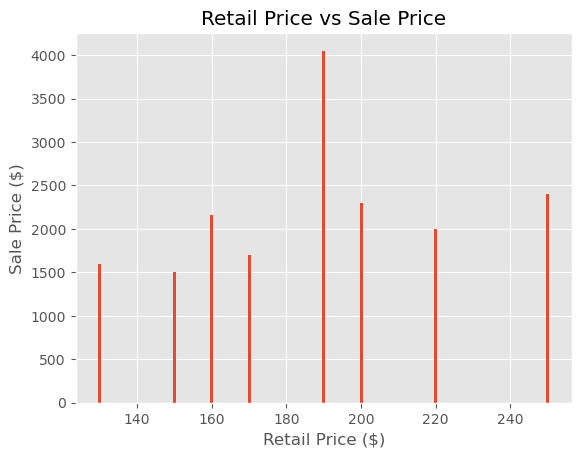

In [56]:
style.use('ggplot')
plt.bar(retail_price, sale_price)
plt.xlabel('Retail Price ($)')
plt.ylabel('Sale Price ($)')
plt.title('Retail Price vs Sale Price')
plt.show()


In [57]:
data.head()

,Order_Day,Order_Month,Order_Year,Release_Day,Release_Month,Release_Year,Brand,Sneaker_Name,Shoe_Size,Buyer_Region,Retail_Price,Sale_Price
0,1,9,2017,24,9,2016,0,5,15,4,220,1097
1,1,9,2017,23,11,2016,0,8,15,4,220,685
2,1,9,2017,23,11,2016,0,9,15,4,220,690
3,1,9,2017,23,11,2016,0,10,16,17,220,1075
4,1,9,2017,11,2,2017,0,11,15,39,220,828


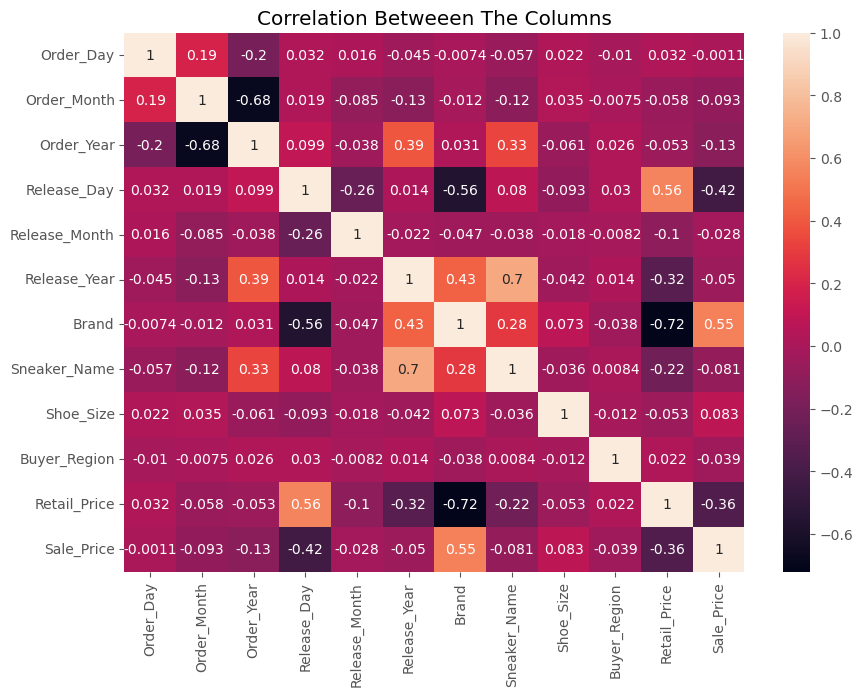

In [58]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Betweeen The Columns')
plt.show()


<AxesSubplot:title={'center':'Correlation Between Retail Price and Sale Price'}, xlabel='Retail_Price', ylabel='Sale_Price'>

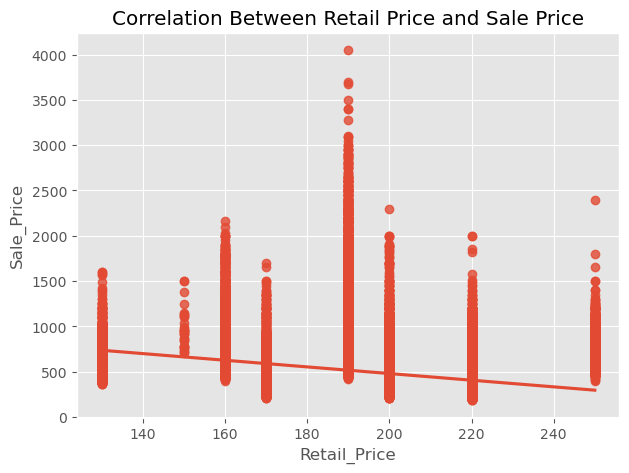

In [59]:
fig=plt.figure(figsize=(7,5))
plt.title('Correlation Between Retail Price and Sale Price')
sns.regplot(x='Retail_Price',y='Sale_Price', data=data)

In [60]:
boundary = int(round(len(data)*0.8,0))
training, testing = data.iloc[:boundary, :], data.iloc[boundary:, :]
training.shape, testing.shape

((79965, 12), (19991, 12))

In [61]:
#assiging the independent and dependent variables to the training and testing sets

X_train, X_test, y_train, y_test = training.iloc[:,:-1], testing.iloc[:,:-1], training.iloc[:,-1], testing.iloc[:,-1]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((79965, 11), (19991, 11), (79965,), (19991,))

In [62]:
#using the scikit-learn library to create a linear regression model


#NOTE FOR ME 
#visual representation
#model accuracy is low with r2 value .27 should be 0.5 or higher would be more accurate EXPLAIN IN REPORT THOROUGHLY

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
abs(lr.score(X_test, y_test))

0.2757120217938642

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
print ("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print ("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print ("r2: ", (metrics.r2_score(pred, y_test)))


MAE:  173.05546218804747
MSE:  50129.30185923385
r2:  -0.058798413043509745


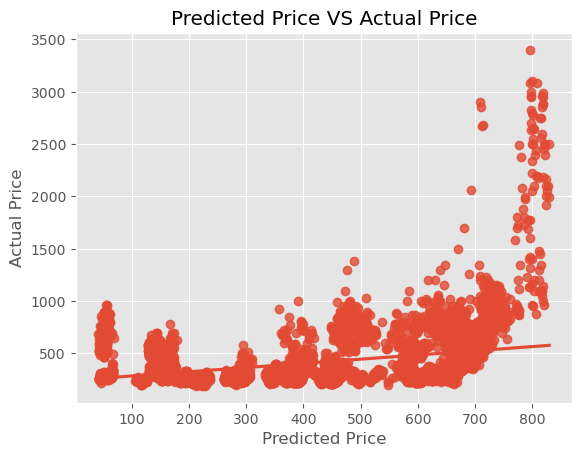

In [65]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Predicted Price VS Actual Price")
plt.show()

In [66]:
#creating a pickle file for linear model 

if not os.path.exists(os.path.join('Model', 'regressor.pkl')):
    pkl.dump(lr, open(os.path.join('Model', 'regressor.pkl'), 'wb'))
else:
    lr = pkl.load(open(os.path.join('Model', 'regressor.pkl'), 'rb'))